In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import sksurv
from sksurv.ensemble import RandomSurvivalForest

In [2]:
col_dtypes = {
    "financial_active": np.int8,
    "promotion_flag": np.int8,
    "variable_rate_index": np.int8,
    "active_12_mths": np.int8,
    "mob": np.int16,
    "open_closed_flag": np.int8,
    "ever_delinquent_flg": np.int8,
    "nbr_mths_due": np.int8,
    "variable_rate_margin": np.float32,
    "stmt_balance": np.float32,
    "prev_balance": np.float32,
    "net_sales": np.float32,
    "net_payments": np.float32,
    "purchase_active": np.int8,
    "credit_limit_amt": np.int32,
    "credit_limit_pa": np.int32,
    "closed": np.int8,
    "active": np.int8,
    "charge_off": np.int8,
    "charge_off_aged": np.int8,
    "charge_off_bk": np.int8,
    "principal_amt": np.float32,
    "principal_amt_chrg_off": np.float32,
    "total_writeoff_amt": np.float32,
    "fee_chg_off_reversal_amt": np.float32,
    "net_finance_charge": np.float32,
    "non_principal_amount_gross": np.float32,
    "non_principal_amount_net": np.float32,
    "non_principal_amount_stmt": np.float32,
    "aged_writeoff_amt": np.float32,
    "bankruptcy_writeoff_amt": np.float32,
    "fc_reversals": np.float32,
    "fee_reversals": np.float32,
    "fraud_writeoff_amt": np.float32,
    "other_writeoff_amt": np.float32,
    "promo_bal_amt": np.float32,
    "recovery_amt": np.float32,
    "writeoff_type_bko": np.int8,
    "writeoff_type_fraud_kiting": np.int8,
    "writeoff_type_fraud_synthetic": np.int8,
    "writeoff_type_deceased": np.int8,
    "writeoff_type_other": np.int8,
    "writeoff_type_aged": np.int8,
    "writeoff_type_settlement": np.int8,
    "writeoff_type_fraud_other": np.int8,
    "writeoff_type_repo": np.int8,
    "writeoff_type_null": np.int8,
    "due_account_2": np.int8,
    "due_account_3": np.int8,
    "due_account_4": np.int8,
    "due_account_5": np.int8,
    "due_account_6": np.int8,
    "due_account_7": np.int8,
    "due_account_8": np.int8,
    "due_balance_2": np.float32,
    "due_balance_3": np.float32,
    "due_balance_4": np.float32,
    "due_balance_5": np.float32,
    "due_balance_6": np.float32,
    "due_balance_7": np.float32,
    "due_balance_8": np.float32,
    "month": np.int8,
    "net_payment_behaviour_tripd_C": np.int8,
    "net_payment_behaviour_tripd_D": np.int8,
    "net_payment_behaviour_tripd_I": np.int8,
    "net_payment_behaviour_tripd_P": np.int8,
    "net_payment_behaviour_tripd_R": np.int8,
    "net_payment_behaviour_tripd_T": np.int8,
    "account_status_code_A": np.int8,
    "account_status_code_Clchange": np.int8,
    "account_status_code_I 0-6": np.int8,
    "account_status_code_I 13-24": np.int8,
    "account_status_code_I 25+": np.int8,
    "account_status_code_I 7-12": np.int8,
    "account_status_code_MonthEnd": np.int8,
    "account_status_code_Recovery": np.int8,
    "account_status_code_W": np.int8,
    "bank_fico_buckets_20_561-580": np.int8,
    "bank_fico_buckets_20_581-600": np.int8,
    "bank_fico_buckets_20_601-620": np.int8,
    "bank_fico_buckets_20_621-640": np.int8,
    "bank_fico_buckets_20_641-660": np.int8,
    "bank_fico_buckets_20_661-680": np.int8,
    "bank_fico_buckets_20_681-700": np.int8,
    "bank_fico_buckets_20_701-720": np.int8,
    "bank_fico_buckets_20_721-740": np.int8,
    "bank_fico_buckets_20_741-760": np.int8,
    "bank_fico_buckets_20_761+": np.int8,
    "bank_fico_buckets_20_<= 560": np.int8,
    "bank_fico_buckets_20_Exception": np.int8,
    "bank_fico_buckets_20_Missing": np.int8, 
    "industry_A": np.int8,
    "industry_B": np.int8,
    "industry_C": np.int8,
    'M_FHOFHOPIPOQ.IUSA': np.float32,
    'M_FYLE.IUSA': np.float32,
    'M_FRT.IUSA': np.float32,
    'M_FYPSAVQ.IUSA': np.float32,
    'M_FC.IUSA': np.float32,
    'FYPCPICA_FEDB.IUSA': np.float32,
    'M_FGDP.IUSA': np.float32,
    'M_FYHHAVGQ.IUSA': np.float32,
    'M_FYFMMEDQ.IUSA': np.float32,
    'FHCSWHPIQ_FEDB.IUSA': np.float32,
    'M_FUNI.IUSA': np.float32,
    'M_FYPQ.IUSA': np.float32,
    'M_FYHHMEDQ.IUSA': np.float32,
    'M_FLBR.IUSA': np.float32,
    'M_FGDP$.IUSA': np.float32,
    'M_FYPDPI$Q.IUSA': np.float32,
    'M_FSDEBT.IUSA': np.float32,
    'M_FSFORQ.IUSA': np.float32,
    'M_FCCALLQ.IUSA': np.float32,
    'M_FCCREVQ.IUSA': np.float32,
    'M_FCCNREVQ.IUSA': np.float32,
    'M_FRTFS.IUSA': np.float32,
    'M_FRTFSX.IUSA': np.float32,
    'M_FRTINETQ.IUSA': np.float32,
    'M_FCNGFO$.IUSA': np.float32,
    'M_FCNGFO.IUSA': np.float32,
    'M_FCSMED$.IUSA': np.float32,
    'M_FCSMED.IUSA': np.float32,
    'M_FET.IUSA': np.float32,
    'M_FLBF_POT.IUSA': np.float32,
    'M_FLBUK15GQ.IUSA': np.float32,
    'M_FLBF.IUSA': np.float32,
    'M_FLBE.IUSA': np.float32,
    'M_FLBU.IUSA': np.float32,
    'M_FLBT.IUSA': np.float32,
    'M_FBKP.IUSA': np.float32,
    'M_FBKPY.IUSA': np.float32,
    'M_FBKB.IUSA': np.float32,
    'M_FBKBY.IUSA': np.float32,
    'M_FRFED.IUSA': np.float32,
    'M_FRGT5Y.IUSA': np.float32,
    'M_FRGT10Y.IUSA': np.float32,
    'M_FYPDPIQ.IUSA': np.float32,
    'M_FAWHTP.IUSA': np.float32,
    'M_FAHETP.IUSA': np.float32,
    'M_FYPEWS$Q.IUSA': np.float32,
    'M_FAWOMF.IUSA': np.float32,
    'M_FECICCQ.IUSA': np.float32,
    'M_FCPIU.IUSA': np.float32,
    'M_FCPIUL1E.IUSA': np.float32,
    'M_FTAXFP.IUSA': np.float32,
    'M_FHOFHOPIQ.IUSA': np.float32,
    'M_FHCLHP1TI20Q.IUSA': np.float32,
    'M_FHST.IUSA': np.float32,
    'M_FHN1.IUSA': np.float32,
    'M_FHPNR.IUSA': np.float32,
    'M_FCUMF.IUSA': np.float32,
    'M_FSP500Q.IUSA': np.float32,
    'M_FCBC.IUSA': np.float32,
    'M_FYPSVQ.IUSA': np.float32,
    'M_FGDP$_POT.IUSA': np.float32,
    'M_FCCDBC.IUSA': np.float32,
    'M_FCCDCF.IUSA': np.float32,
    'M_FCCDRT.IUSA': np.float32,
    'M_FCCDAU.IUSA': np.float32,
    'M_FCCDRA.IUSA': np.float32,
    'M_FCCDRE.IUSA': np.float32,
    'M_FCCDRF.IUSA': np.float32,
    'M_FCCDSL.IUSA': np.float32,
    'M_FCCDTO.IUSA': np.float32,
    'M_FCCDOT.IUSA': np.float32,
    'M_FIP.IUSA': np.float32,
    'M_FYPTRPQ.IUSA': np.float32,
    'M_FPOPQ.IUSA': np.float32,
    'M_FPOP.IUSA': np.float32,
    'M_FPOP16GQ.IUSA': np.float32,
    'M_FRTB3M.IUSA': np.float32,
    'M_FZFL075035503Q.IUSA': np.float32,
    'M_FRBAAC.IUSA': np.float32,
    'M_FRFHLMCFM.IUSA': np.float32,
    'M_FRPRIME.IUSA': np.float32,
    'M_FDJMIIUSDDWCFTDQ.IUSA': np.float32,
    'M_FSPVOL.IUSA': np.float32,
    'M_FXSLASCILQ.IUSA': np.float32,
    'M_FXSLASINCCQ.IUSA': np.float32,
    'M_FPCNBEMP.IUSA': np.float32,
    'M_FBCFCOFCCQ.IUSA': np.float32,
    'M_FETP.IUSA': np.float32,
    'M_FLTV.IUSA': np.float32,
    'M_FC$.IUSA': np.float32,
    'M_FEIAMGTTQ.IUSA': np.float32,
    'M_FXCPMGASUQ.IUSA': np.float32,
    'M_FRBBBQ.IUSA': np.float32,
    'M_FHOWNRQ.IUSA': np.float32,
    'M_FIFR_FEDS.IUSA': np.float32,
    'M_FIFR$_FEDS.IUSA': np.float32    
}

In [3]:
df = pd.read_csv("training_data_full.csv", dtype=col_dtypes)

In [4]:
df.shape

(5758219, 189)

In [5]:
df.head()

financial_active  promotion_flag  variable_rate_index  active_12_mths  mob  \
0                 1               0                    0               1    3   
1                 0               0                    0               1  159   
2                 1               0                    0               1   22   
3                 1               0                    1               1   16   
4                 1               0                    0               0    3   

   open_closed_flag  ever_delinquent_flg  nbr_mths_due  stmt_balance  \
0                 1                    0             0         34.77   
1                 1                    0             0          0.00   
2                 1                    0             0          0.00   
3                 1                    1             0          0.00   
4                 1                    0             2          0.00   

   prev_balance  ...  M_FBCFCOFCCQ.IUSA  M_FETP.IUSA  M_FLTV.IUSA  \
0   1918.319946  ...           3.680373   126.561996    79.000000   
1      0.000000  ...           3.747979   128.205994    79.525536   
2      0.000000  ...           3.725027   128.026001    79.909912   
3      0.000000  ...           3.657520   126.429001    78.699997   
4      0.000000  ...           3.698200   127.622002    78.900002   

     M_FC$.IUSA  M_FEIAMGTTQ.IUSA  M_FXCPMGASUQ.IUSA  M_FRBBBQ.IUSA  \
0  12992.581055           2.92780         288.463989       4.612021   
1  13283.355469           2.80350         275.317505       3.827682   
2  13255.816406           2.94625         286.220001       4.022286   
3  12946.163086           2.96950         292.225006       4.637647   
4  13063.024414           2.39325         231.347504       4.685307   

   M_FHOWNRQ.IUSA  M_FIFR_FEDS.IUSA  M_FIFR$_FEDS.IUSA  
0       64.375854        790.916504         603.062012  
1       64.456200        787.595398         587.938660  
2       64.287537        783.112244         586.005188  
3       64.462227        791.133850         605.149353  
4       64.160614        788.274902         591.956909  

[5 rows x 189 columns]

In [6]:
print(df.dtypes.to_string())

financial_active                     int8
promotion_flag                       int8
variable_rate_index                  int8
active_12_mths                       int8
mob                                 int16
open_closed_flag                     int8
ever_delinquent_flg                  int8
nbr_mths_due                         int8
stmt_balance                      float32
prev_balance                      float32
net_sales                         float32
net_payments                      float32
purchase_active                      int8
credit_limit_amt                    int32
credit_limit_pa                     int32
closed                               int8
active                               int8
charge_off                           int8
charge_off_aged                      int8
charge_off_bk                        int8
principal_amt                     float32
principal_amt_chrg_off            float32
total_writeoff_amt                float32
fee_chg_off_reversal_amt          

In [4]:
X = df.drop(["charge_off", "month"], axis=1)
# y = df[["charge_off", "month"]]
y = [(a, b) for a, b in zip(df['charge_off'].astype(bool), df['month'])]

In [5]:
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.999, random_state=random_state, stratify=y)
y_train = np.array(y_train, dtype=[('charge_off','?'),('month','<f8')])

In [7]:
random_state = 42
rsf = RandomSurvivalForest(n_estimators=1000,
#                            min_samples_split=10,
#                            min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(X_train, y_train)

KeyboardInterrupt: 

In [13]:
train_pred = rsf.predict(X_train)

In [14]:
rsf.feature_importances_[0:20]

NotImplementedError: 

In [15]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

In [18]:
estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_train, y_train)

LinAlgError: Matrix is singular.

In [6]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

est_cph_tree = GradientBoostingSurvivalAnalysis(
    n_estimators=1000, random_state=42
)
est_cph_tree.fit(X_train, y_train)


GradientBoostingSurvivalAnalysis(n_estimators=1000, random_state=42)

In [8]:
ft_imp = pd.Series(est_cph_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [10]:
ft_imp[0:40]

aged_writeoff_amt                0.238406
active                           0.185553
principal_amt_chrg_off           0.180030
writeoff_type_null               0.174882
fee_reversals                    0.153330
total_writeoff_amt               0.042400
M_FLBT.IUSA                      0.004878
M_FCBC.IUSA                      0.002538
bank_fico_buckets_20_<= 560      0.001870
M_FHST.IUSA                      0.001518
M_FIFR_FEDS.IUSA                 0.001129
M_FIFR$_FEDS.IUSA                0.001101
charge_off_aged                  0.001098
fc_reversals                     0.001022
M_FIP.IUSA                       0.001012
prev_balance                     0.000893
M_FCCDRA.IUSA                    0.000764
bank_fico_buckets_20_621-640     0.000710
M_FCCDRF.IUSA                    0.000519
ever_delinquent_flg              0.000479
M_FCCDTO.IUSA                    0.000405
industry_A                       0.000367
M_FHPNR.IUSA                     0.000226
M_FLBU.IUSA                      0

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns; sns.set()

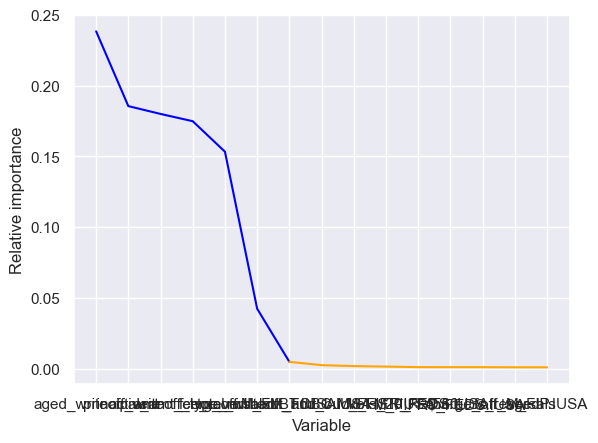

In [30]:
sns.lineplot(data=ft_imp[0:7], color="blue")
sns.lineplot(data=ft_imp[6:15], color="orange")
plt.xlabel("Variable")
plt.ylabel("Relative importance")
plt.show()

In [23]:
ft_imp.cumsum().head(15)

aged_writeoff_amt              0.238406
active                         0.423959
principal_amt_chrg_off         0.603989
writeoff_type_null             0.778871
fee_reversals                  0.932200
total_writeoff_amt             0.974601
M_FLBT.IUSA                    0.979478
M_FCBC.IUSA                    0.982016
bank_fico_buckets_20_<= 560    0.983886
M_FHST.IUSA                    0.985404
M_FIFR_FEDS.IUSA               0.986533
M_FIFR$_FEDS.IUSA              0.987634
charge_off_aged                0.988731
fc_reversals                   0.989753
M_FIP.IUSA                     0.990766
dtype: float64

In [24]:
ft_imp.cumsum().head(15).index

Index(['aged_writeoff_amt', 'active', 'principal_amt_chrg_off',
       'writeoff_type_null', 'fee_reversals', 'total_writeoff_amt',
       'M_FLBT.IUSA', 'M_FCBC.IUSA', 'bank_fico_buckets_20_<= 560',
       'M_FHST.IUSA', 'M_FIFR_FEDS.IUSA', 'M_FIFR$_FEDS.IUSA',
       'charge_off_aged', 'fc_reversals', 'M_FIP.IUSA'],
      dtype='object')

In [57]:
sns.set()


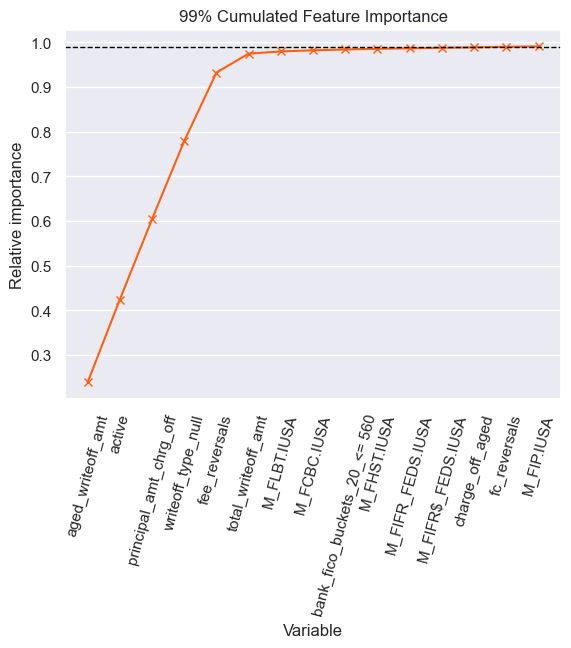

In [77]:
fig, ax = plt.subplots()
# sns.lineplot(data=ft_imp.cumsum().head(15), markers=True)
plt.plot(ft_imp.cumsum().head(15), marker="x", color="#FF5F0F")
plt.axhline(0.99, linestyle="--", label="0.99", lw=1, color="black")
# add 99% line
# axis tick
#
# sns.despine(left=True)
ax.grid(axis='x')
plt.xticks(rotation=75)
plt.xlabel("Variable")
plt.ylabel("Relative importance")
plt.title("99% Cumulated Feature Importance")
plt.show()

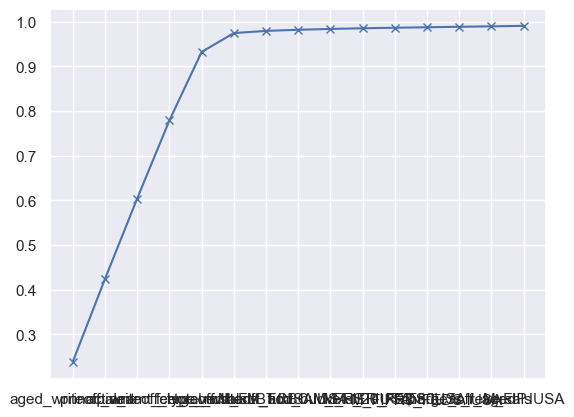

In [70]:
plt.plot(ft_imp.cumsum().head(15), marker="x")

In [6]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, X_train, y_train, random_state=random_state
)




NameError: name 'rsf' is not defined

In [ ]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_train.columns
).sort_values(by="importances_mean", ascending=False)

In [11]:

from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.5)

df_mini = df.sample(frac=0.01)
cph.fit(df_mini, duration_col = 'month', event_col = 'charge_off')

cph.print_summary()

C:\Users\billy\AppData\Roaming\Python\Python39\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['closed', 'writeoff_type_fraud_kiting', 'writeoff_type_fraud_synthetic', 'writeoff_type_other', 'writeoff_type_settlement', 'writeoff_type_repo', 'due_account_8', 'due_balance_8', 'account_status_code_Clchange', 'account_status_code_MonthEnd'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\billy\AppData\Roaming\Python\Python39\site-packages\lifelines\utils\__init__.py:800: RuntimeWarning: invalid value encountered in true_divide
  return (X - mean) / std
C:\Users\billy\AppData\Roaming\Python\Python39\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column account_status_code_I 13-24 have very low variance when conditioned on death even

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.